# Notebook Contents

- [Imports](#Imports)
- [Data](#Data)
- [Spray Chart](#Spray-Chart)
    - [ATL Home Field Spray Chart](#ATL-Spray-Chart)
- [Batted Ball Profiles](#Batted-Ball-Profiles)
    - [Batted Ball Profile - LA](#Batted-Ball-Profile---LA)
    - [Batted Ball Profile - EV](#Batted-Ball-Profile---EV)
    - [Quality Contact by LA & EV](#Quality-Contact-by-Launch-Angle-&-Exit-Velocity)
    - [ISO Value by LA & EV](#ISO-Value-by-Launch-Angle-&-Exit-Velocity)
    - [BABIP Value by LA & EV](#BABIP-Value-by-Launch-Angle-&-Exit-Velocity)
    - [wOBA Value by LA & EV](#[wOBA-Value-by-Launch-Angle-&-Exit-Velocity)
    - [Estimated wOBA by LA & EV](#Estimated-wOBA-by-Launch-Angle-&-Exit-Velocity)
    - [Estimated BA by LA & EV](#Estimated-BA-by-Launch-Angle-&-Exit-Velocity)
    - [Home Runs by LA and EV](#Home-Runs-by-Launch-Angle-and-Exit-Velocity)
    - [xwOBA Against EV](#xwOBA-Against-EV)
    - [xwOBA Value of a Hit Against Its EV](#xwOBA-Value-of-a-Hit-Against-Its-Exit-Velocity)
- [Pitch Usage & Counts](#Pitch-Usage-&-Counts)
    - [Counts Breakdown](#Counts-Breakdown)
    - [Pitch Usage by Pitcher Handedness](#Pitch-Usage-by-Pitcher-Handedness)
    - [Pitch Type by Count](#Pitch-Type-by-Count)
- [Heatmaps](#Heatmaps)
    - [In-Zone Take Heatmaps - by Pitch Type vs. RHP](#In-Zone-Take-Heatmaps--by-Pitch-Type-vs.-RHP)
    - [In-Zone Take Heatmaps - by Pitch Type vs. LHP](#In-Zone-Take-Heatmaps--by-Pitch-Type-vs.-LHP)
    - [Out-of-Zone Chase Heatmaps - by Pitch Type vs. RHP](#Out-of-Zone-Chase-Heatmaps---by-Pitch-Type-vs.-RHP)
    - [Out-of-Zone Chase Heatmaps - by Pitch Type vs. LHP](#Out-of-Zone-Chase-Heatmaps---by-Pitch-Type-vs.-LHP)
    - [4-Seam Heatmaps](#4-Seam-Heatmaps)
    - [Slider Heatmaps](#Slider-Heatmaps)
    - [Sinker Heatmaps](#Sinker-Heatmaps)
    - [Changeup Heatmaps](#Changeup-Heatmaps)
    - [Curveball Heatmaps](#Curveball-Heatmaps)
    - [Cutter Heatmaps](#Cutter-Heatmaps)
    - [Knuckle Curve Heatmaps](#Knuckle-Curve-Heatmaps)
    - [Split-Finger Heatmaps](#Split-Finger-Heatmaps)
    - [Fastball Heatmaps](#Fastball-Heatmaps)
    - [Slow Curve Heatmaps](#Slow-Curve-Heatmaps)

# Imports

In [1]:
from pybaseball import spraychart
from pybaseball.plotting import plot_bb_profile
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings('ignore')

In [2]:
swanson = pd.read_csv('../data/dansby-swanson.csv')
swanson.drop(columns = ['Unnamed: 0'], inplace = True)

# Font Dictionary
font_title = {
    'size': 12,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

pd.set_option('max_columns', None)
print(swanson.shape)
swanson.head(2)

(2578, 93)


,pitch_type,game_date,player_name,launch_speed,launch_angle,hit_distance_sc,hc_x,hc_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,type,hit_location,bb_type,events,description,des,balls,strikes,pitch_count,zone,is_strike,swing_miss,first_pitch_take,first_pitch_swing,in_zone_take,out_of_zone_chase,release_speed,release_spin_rate,spin_axis,pfx_x,pfx_-x,pfx_z,release_pos_x,release_pos_z,effective_speed,release_extension,release_pos_y,plate_-x,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,stand,p_throws,release_speed.1,release_spin_rate.1,spin_axis.1,pfx_x.1,pfx_-x.1,pfx_z.1,release_pos_x.1,release_pos_z.1,effective_speed.1,release_extension.1,release_pos_y.1,plate_-x.1,plate_x.1,plate_z.1,batter,pitcher,home_team,away_team,if_fielding_alignment,of_fielding_alignment,game_pk,at_bat_number,pitch_number,pitch_name,home_score,away_score,post_away_score,post_home_score,delta_home_win_exp,delta_run_exp,game_year
0,FF,2021-10-03,"Swanson, Dansby",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,NaN,S,2.0,NaN,strikeout,swinging_strike,Dansby Swanson strikes out swinging.,1,2,1-2,3,1,1,0,0,0,0,92.0,2208.0,203.0,0.14,-1.68,8.28,-2.0,5.19,93.5,6.8,53.67,-0.53,0.53,3.26,NaN,NaN,NaN,2,6,Bot,664850,6.170758,-133.962806,-0.638454,0.603948,24.763260,-23.806454,3.41,1.56,R,R,92.0,2208.0,203.0,0.14,-1.68,8.28,-2.0,5.19,93.5,6.8,53.67,-0.53,0.53,3.26,621020,592866,ATL,NYM,Infield shift,Standard,632254,46,5,4-Seam Fastball,5,0,0,5,-0.001,-0.073,2021
1,FF,2021-10-03,"Swanson, Dansby",82.4,30.0,273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,foul,Dansby Swanson strikes out swinging.,1,2,1-2,12,1,0,0,0,0,0,93.5,2137.0,210.0,0.01,-0.12,9.48,-2.1,5.13,94.7,6.7,53.84,-0.87,0.87,2.74,NaN,NaN,NaN,2,6,Bot,664850,7.673758,-136.110030,-2.235441,-1.328747,25.813549,-22.006688,3.41,1.56,R,R,93.5,2137.0,210.0,0.01,-0.12,9.48,-2.1,5.13,94.7,6.7,53.84,-0.87,0.87,2.74,621020,592866,ATL,NYM,Infield shift,Standard,632254,46,4,4-Seam Fastball,5,0,0,5,0.000,0.000,2021


In [3]:
swanson.groupby(['pitch_type'], sort = False).mean()

,launch_speed,launch_angle,hit_distance_sc,hc_x,hc_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,hit_location,balls,strikes,zone,is_strike,swing_miss,first_pitch_take,first_pitch_swing,in_zone_take,out_of_zone_chase,release_speed,release_spin_rate,spin_axis,pfx_x,pfx_-x,pfx_z,release_pos_x,release_pos_z,effective_speed,release_extension,release_pos_y,plate_-x,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,release_speed.1,release_spin_rate.1,spin_axis.1,pfx_x.1,pfx_-x.1,pfx_z.1,release_pos_x.1,release_pos_z.1,effective_speed.1,release_extension.1,release_pos_y.1,plate_-x.1,plate_x.1,plate_z.1,batter,pitcher,game_pk,at_bat_number,pitch_number,home_score,away_score,post_away_score,post_home_score,delta_home_win_exp,delta_run_exp,game_year
pitch_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FF,85.880882,28.654412,200.717391,127.900435,109.800290,0.333688,0.429014,0.363397,1.000000,0.167464,0.239234,3.652174,5.446328,0.985430,0.905960,8.227815,0.672848,0.116556,0.043709,0.104636,0.119205,0.034437,93.730199,2271.878146,197.389404,-0.285868,3.430411,15.537377,-0.943060,5.870371,93.945430,6.416291,54.084013,-0.191974,0.191974,2.646861,601782.640625,577734.313433,622526.872727,1.005298,4.862252,589848.360265,3.635934,-136.256541,-5.475395,-4.505360,29.312688,-14.978328,3.477444,1.601828,93.730199,2271.878146,197.389404,-0.285868,3.430411,15.537377,-0.943060,5.870371,93.945430,6.416291,54.084013,-0.191974,0.191974,2.646861,621020.0,600300.932450,633360.276821,38.091391,2.984106,2.353642,2.515232,2.545695,2.365563,-0.002016,0.006812,2021.0
SI,85.021769,13.727891,153.115646,120.403750,125.761000,0.341175,0.415287,0.355652,1.000000,0.200000,0.165217,3.200000,5.190000,1.013699,0.783105,8.828767,0.652968,0.100457,0.066210,0.084475,0.134703,0.029680,93.575342,2119.816934,200.432494,-0.638927,7.667123,9.031233,-0.943219,5.823379,93.766438,6.424886,54.075183,0.165616,-0.165616,2.292648,593691.562500,570508.041667,580230.929412,1.116438,5.187215,581986.118721,3.446812,-136.013145,-5.033882,-8.780578,29.400544,-21.885873,3.484498,1.610342,93.575342,2119.816934,200.432494,-0.638927,7.667123,9.031233,-0.943219,5.823379,93.766438,6.424886,54.075183,0.165616,-0.165616,2.292648,621020.0,595982.319635,633448.712329,40.636986,2.906393,2.260274,2.344749,2.353881,2.280822,0.000815,-0.003710,2021.0
SL,81.696129,14.264516,149.134615,111.123646,121.141875,0.311333,0.346458,0.273567,0.993631,0.146497,0.140127,3.145833,4.746377,0.810594,0.922953,10.224719,0.590690,0.173355,0.065811,0.075441,0.118780,0.089888,85.356501,2429.313002,134.242376,0.381332,-4.575987,1.980867,-1.526421,5.776051,85.624559,6.363724,54.138186,-0.513098,0.513098,1.852681,601658.518519,585075.025641,609798.349462,1.024077,5.383628,586521.664526,4.082700,-124.219177,-3.316556,3.055685,23.886542,-29.918725,3.478475,1.604976,85.356501,2429.313002,134.242376,0.381332,-4.575987,1.980867,-1.526421,5.776051,85.624559,6.363724,54.138186,-0.513098,0.513098,1.852681,621020.0,604655.767255,633416.369181,42.491172,2.826645,2.346709,2.712681,2.725522,2.369181,0.000274,0.001167,2021.0
CH,78.740860,-2.204301,98.329787,112.431224,138.618571,0.388878,0.422735,0.322297,1.000000,0.243243,0.108108,2.918367,4.768116,1.011450,1.087786,10.141221,0.637405,0.167939,0.030534,0.064885,0.064885,0.087786,84.195038,1751.458015,191.851145,-0.203740,2.444885,5.908397,-0.290725,5.748817,84.381679,6.424809,54.078473,-0.195649,0.195649,1.824122,579116.375000,590076.021739,615332.075949,0.992366,4.660305,592445.038168,1.643009,-122.384573,-3.700015,-2.697465,23.751304,-26.713149,3.470496,1.596603,84.195038,1751.458015,191.851145,-0.203740,2.444885,5.908397,-0.290725,5.748817,84.381679,6.424809,54.078473,-0.195649,0.195649,1.824122,621020.0,595098.835878,633356.625954,36.244275,3.251908,2.209924,2.244275,2.263359,2.217557,-0.002126,0.006450,2021.0
FC,80.594737,

In [4]:
counts = swanson[['is_strike', 'in_zone_take', 'out_of_zone_chase', 'zone', 'launch_speed', 'launch_angle', 
                  'hit_distance_sc', 'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle', 
                  'pitch_count', 'woba_value', 'woba_denom', 'babip_value', 'iso_value', 'launch_speed_angle']]

In [5]:
r_swanson = swanson.loc[swanson['p_throws'] == 'R']
l_swanson = swanson.loc[swanson['p_throws'] == 'L']
# all pitchers
ff = swanson.loc[swanson['pitch_type'] == 'FF']
sl = swanson.loc[swanson['pitch_type'] == 'SL']
si = swanson.loc[swanson['pitch_type'] == 'SI']
ch = swanson.loc[swanson['pitch_type'] == 'CH']
cu = swanson.loc[swanson['pitch_type'] == 'CU']
fc = swanson.loc[swanson['pitch_type'] == 'FC']
kc = swanson.loc[swanson['pitch_type'] == 'KC']
fs = swanson.loc[swanson['pitch_type'] == 'FS']
fa = swanson.loc[swanson['pitch_type'] == 'FA']
cs = swanson.loc[swanson['pitch_type'] == 'CS']
# vs RHP
r_ff = swanson.loc[(swanson['pitch_type'] == 'FF') & (swanson['p_throws'] == 'R')]
r_sl = swanson.loc[(swanson['pitch_type'] == 'SL') & (swanson['p_throws'] == 'R')]
r_si = swanson.loc[(swanson['pitch_type'] == 'SI') & (swanson['p_throws'] == 'R')]
r_ch = swanson.loc[(swanson['pitch_type'] == 'CH') & (swanson['p_throws'] == 'R')]
r_cu = swanson.loc[(swanson['pitch_type'] == 'CU') & (swanson['p_throws'] == 'R')]
r_fc = swanson.loc[(swanson['pitch_type'] == 'FC') & (swanson['p_throws'] == 'R')]
r_kc = swanson.loc[(swanson['pitch_type'] == 'KC') & (swanson['p_throws'] == 'R')]
r_fs = swanson.loc[(swanson['pitch_type'] == 'FS') & (swanson['p_throws'] == 'R')]
r_fa = swanson.loc[(swanson['pitch_type'] == 'FA') & (swanson['p_throws'] == 'R')]
r_cs = swanson.loc[(swanson['pitch_type'] == 'CS') & (swanson['p_throws'] == 'R')]
# vs LHP
l_ff = swanson.loc[(swanson['pitch_type'] == 'FF') & (swanson['p_throws'] == 'L')]
l_sl = swanson.loc[(swanson['pitch_type'] == 'SL') & (swanson['p_throws'] == 'L')]
l_si = swanson.loc[(swanson['pitch_type'] == 'SI') & (swanson['p_throws'] == 'L')]
l_ch = swanson.loc[(swanson['pitch_type'] == 'CH') & (swanson['p_throws'] == 'L')]
l_cu = swanson.loc[(swanson['pitch_type'] == 'CU') & (swanson['p_throws'] == 'L')]
l_fc = swanson.loc[(swanson['pitch_type'] == 'FC') & (swanson['p_throws'] == 'L')]
l_kc = swanson.loc[(swanson['pitch_type'] == 'KC') & (swanson['p_throws'] == 'L')]
l_fs = swanson.loc[(swanson['pitch_type'] == 'FS') & (swanson['p_throws'] == 'L')]
l_fa = swanson.loc[(swanson['pitch_type'] == 'FA') & (swanson['p_throws'] == 'L')]
l_cs = swanson.loc[(swanson['pitch_type'] == 'CS') & (swanson['p_throws'] == 'L')]

# Spray Chart

### ATL Spray Chart

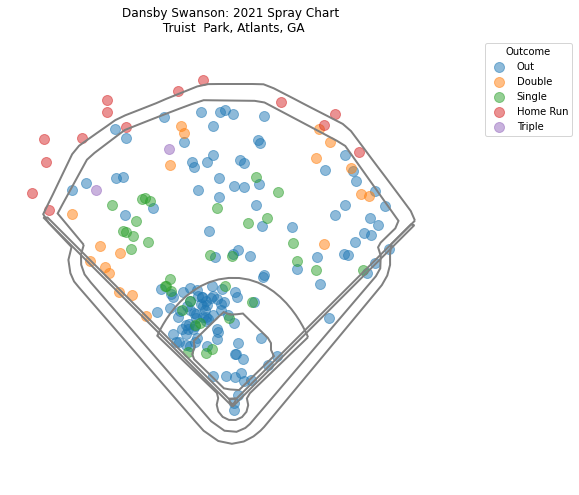

In [6]:
spray_atl = swanson[swanson['home_team'] == 'ATL']
spraychart(spray_atl, 'braves', title = 'Dansby Swanson: 2021 Spray Chart \n Truist  Park, Atlants, GA');

# Batted Ball Profiles

### Batted Ball Profile - LA

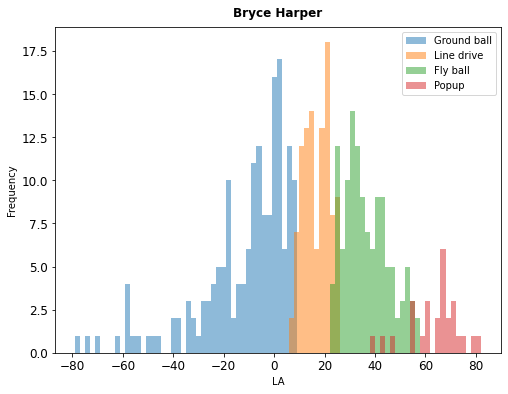

In [7]:
plt.figure(figsize = (8, 6))

plot_bb_profile(swanson, parameter = 'launch_angle')
plt.xlabel('LA'), plt.ylabel('Frequency'), plt.legend()
plt.title('Bryce Harper', fontdict = font_title, pad = 15);

### Batted Ball Profile - EV

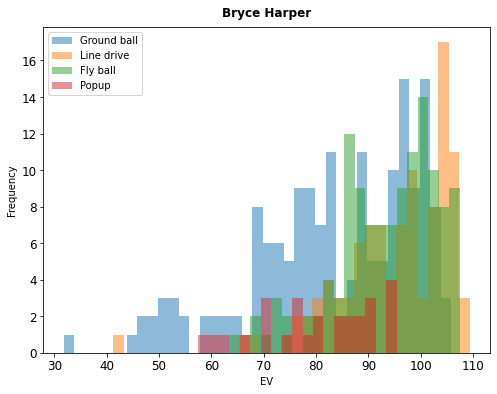

In [8]:
plt.figure(figsize = (8, 6))

plot_bb_profile(swanson, parameter = 'launch_speed')
plt.xlabel('EV'), plt.ylabel('Frequency'), plt.legend()
plt.title('Bryce Harper', fontdict = font_title, pad = 15);

### Quality Contact by Launch Angle & Exit Velocity

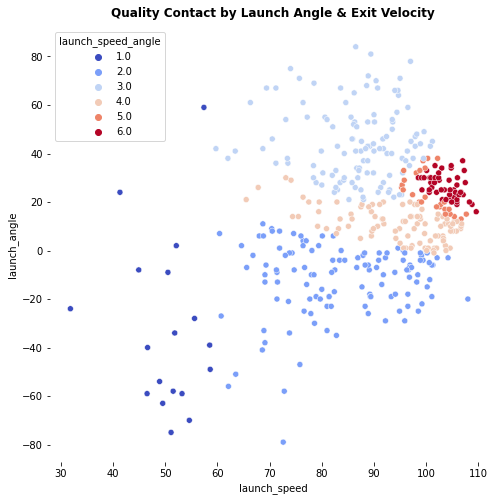

In [9]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = swanson, x = 'launch_speed', y = 'launch_angle', hue = 'launch_speed_angle', 
                palette = 'coolwarm')
plt.title('Quality Contact by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### ISO Value by Launch Angle & Exit Velocity

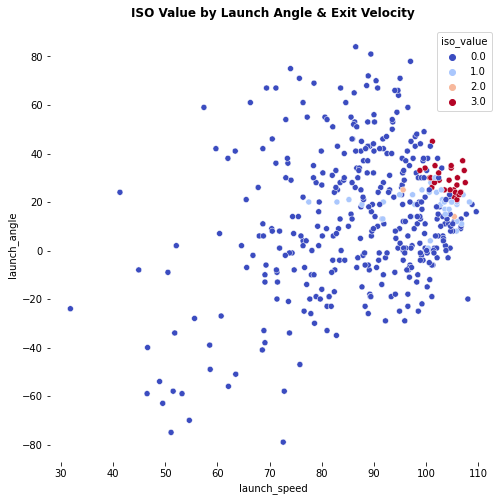

In [10]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = swanson, x = 'launch_speed', y = 'launch_angle', hue = 'iso_value', 
                palette = 'coolwarm')
plt.title('ISO Value by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### BABIP Value by Launch Angle & Exit Velocity

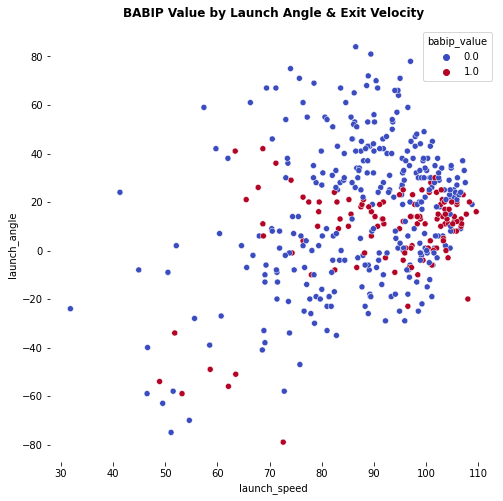

In [11]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = swanson, x = 'launch_speed', y = 'launch_angle', hue = 'babip_value', 
                palette = 'coolwarm')
plt.title('BABIP Value by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### wOBA Value by Launch Angle & Exit Velocity

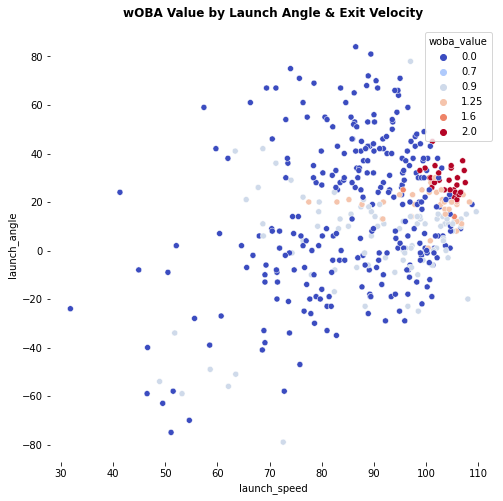

In [12]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = swanson, x = 'launch_speed', y = 'launch_angle', hue = 'woba_value', 
                palette = 'coolwarm')
plt.title('wOBA Value by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### xwOBA Value by Launch Angle & Exit Velocity

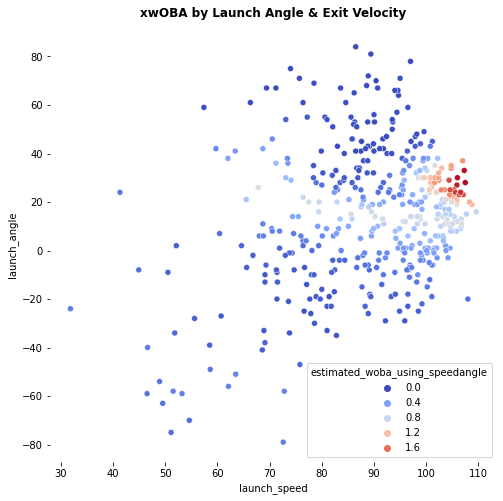

In [13]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = swanson, x = 'launch_speed', y = 'launch_angle', hue = 'estimated_woba_using_speedangle', 
                palette = 'coolwarm')
plt.title('xwOBA by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### xBA Value by Launch Angle & Exit Velocity

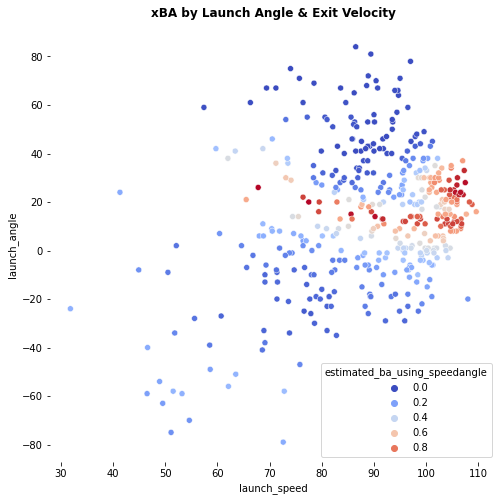

In [14]:
fig, ax = plt.subplots(figsize = (8, 8))

sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = swanson, x = 'launch_speed', y = 'launch_angle', hue = 'estimated_ba_using_speedangle', 
                palette = 'coolwarm')
plt.title('xBA by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### Home Runs by Launch Angle and Exit Velocity

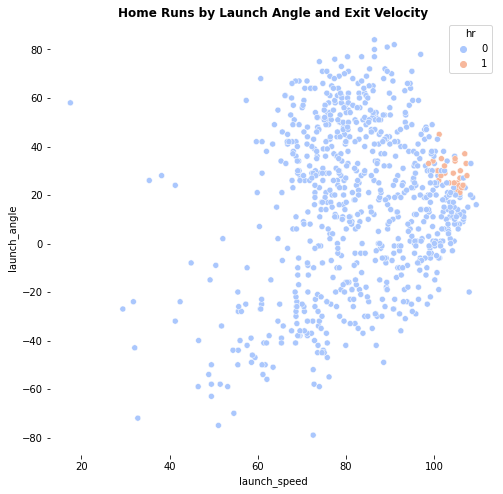

In [15]:
swanson['hr'] = [1 if x == 'home_run' else 0 for x in swanson['events']]
fig, ax = plt.subplots(figsize=(8, 8))

sns.despine(fig, left=True, bottom=True)
sns.scatterplot(data = swanson, x = 'launch_speed', y = 'launch_angle', hue = 'hr', palette = 'coolwarm')
plt.title('Home Runs by Launch Angle and Exit Velocity', fontdict = font_title);

### xwOBA Against EV

In [16]:
swanson.groupby(pd.cut(swanson.launch_speed, 6)).mean()

,launch_speed,launch_angle,hit_distance_sc,hc_x,hc_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,hit_location,balls,strikes,zone,is_strike,swing_miss,first_pitch_take,first_pitch_swing,in_zone_take,out_of_zone_chase,release_speed,release_spin_rate,spin_axis,pfx_x,pfx_-x,pfx_z,release_pos_x,release_pos_z,effective_speed,release_extension,release_pos_y,plate_-x,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,release_speed.1,release_spin_rate.1,spin_axis.1,pfx_x.1,pfx_-x.1,pfx_z.1,release_pos_x.1,release_pos_z.1,effective_speed.1,release_extension.1,release_pos_y.1,plate_-x.1,plate_x.1,plate_z.1,batter,pitcher,game_pk,at_bat_number,pitch_number,home_score,away_score,post_away_score,post_home_score,delta_home_win_exp,delta_run_exp,game_year,hr
launch_speed,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(17.408, 32.85]",28.720000,-21.600000,2.600000,133.730000,190.060000,0.246000,0.221000,0.000000,0.0,0.000000,0.000000,1.000000,3.000000,1.600000,1.200000,8.000000,1.0,0.0,0.0,0.000000,0.0,0.0,86.280000,1829.400000,212.200000,-0.622000,7.464000,7.128000,-1.654000,5.674000,85.900000,5.960000,54.546000,-0.036000,0.036000,2.000000,518692.000000,NaN,542303.000000,1.400000,5.800000,556198.200000,5.206228,-125.549044,-3.694721,-7.270067,24.490608,-25.416233,3.41,1.56,86.280000,1829.400000,212.200000,-0.622000,7.464000,7.128000,-1.654000,5.674000,85.900000,5.960000,54.546000,-0.036000,0.036000,2.000000,621020.0,599546.400000,633495.600000,45.600000,4.000000,1.400000,4.200000,4.400000,1.400000,-0.003400,-0.030200,2021.0,0.000000
"(32.85, 48.2]",42.075000,-10.625000,22.875000,132.705000,178.805000,0.203500,0.191000,0.000000,1.0,0.000000,0.000000,1.000000,3.000000,0.500000,0.625000,8.875000,1.0,0.0,0.0,0.375000,0.0,0.0,83.450000,2217.750000,152.875000,0.155000,-1.860000,3.495000,-1.137500,5.788750,83.737500,6.450000,54.052500,0.331250,-0.331250,2.115000,645277.000000,614659.000000,591900.000000,1.250000,3.250000,609292.875000,1.561805,-121.454559,-2.592859,0.589554,23.896494,-28.564030,3.41,1.56,83.450000,2217.750000,152.875000,0.155000,-1.860000,3.495000,-1.137500,5.788750,83.737500,6.450000,54.052500,0.331250,-0.331250,2.115000,621020.0,577608.625000,632777.500000,23.500000,2.125000,0.500000,1.875000,1.875000,0.500000,-0.010500,-0.160375,2021.0,0.000000
"(48.2, 63.55]",57.365306,-25.142857,30.571429,120.980000,170.112500,0.194050,0.176900,0.315000,1.0,0.350000,0.000000,1.500000,4.350000,1.244898,1.265306,9.551020,1.0,0.0,0.0,0.142857,0.0,0.0,85.255102,2179.979592,164.122449,-0.002857,0.034286,4.432653,-1.204082,5.680204,85.322449,6.291837,54.208980,-0.152245,0.152245,2.084082,565187.600000,579831.125000,589450.000000,0.959184,5.000000,581976.653061,3.240777,-124.039264,-2.899273,-1.212153,24.469412,-27.495763,3.41,1.56,85.255102,2179.979592,164.122449,-0.002857,0.034286,4.432653,-1.204082,5.680204,85.322449,6.291837,54.208980,-0.152245,0.152245,2.084082,621020.0,586143.040816,633404.489796,38.714286,3.693878,2.367347,2.551020,2.551020,2.387755,-0.002347,-0.000673,2021.0,0.000000
"(63.55, 78.9]",73.043750,17.886719,129.261719,123.413623,149.712899,0.200130,0.187899,0.174638,1.0,0.188406,0.014493,2.478261,5.362319,1.074219,1.074219,7.078125,1.0,0.0,0.0,0.191406,0.0,0.0,88.996875,2194.496094,169.140625,-0.021484,0.257812,8.096719,-0.791289,5.859336,89.099219,6.321875,54.181133,-0.017422,0.017422,2.454336,620811.000000,586072.945455,614358.202532,1.113281,5.078125,593007.851562,2.092682,-129.461742,-3.756615,-1.231721,26.612581,-23.259790,3.41,1.56,88.996875,2194.496094,169.140625,-0.021484,0.257812,8.096719,-0.791289,5.859336,89.099219,6.321875,54.181133,-0.017422,0.017422,2.454336,621020.0,596113.148438,633415.539062,40.558594,3.343750,2.652344,2.664062,2.667969,2.671875,0.000859,-0.057820,2021.0,0.000000
"(78.9, 94.25]",85.932028,23.241993,163.533808,126.172414,124.805172,0.208793,0

### xwOBA Value of a Hit Against Its Exit Velocity

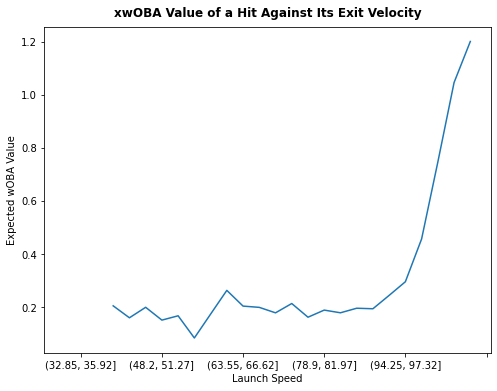

In [17]:
groups = swanson.groupby(pd.cut(swanson.launch_speed, 30))
plt.figure(figsize = (8, 6))
ax = groups['estimated_woba_using_speedangle'].mean().plot()
plt.xlabel('Launch Speed'), plt.ylabel('Expected wOBA Value')
plt.title('xwOBA Value of a Hit Against Its Exit Velocity', fontdict = font_title, pad = 15);

# Pitch Usage / Counts

In [18]:
counts.groupby(['pitch_count']).mean()

,is_strike,in_zone_take,out_of_zone_chase,zone,launch_speed,launch_angle,hit_distance_sc,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle
pitch_count,,,,,,,,,,,,,,
0-0,0.615975,0.215054,0.029186,8.791091,83.978947,20.881579,164.058065,0.337380,0.396418,0.421250,1.000000,0.237500,0.300000,3.430380
0-1,0.596273,0.099379,0.068323,9.624224,84.201031,12.288660,155.628866,0.382451,0.448353,0.567647,1.000000,0.392157,0.352941,3.509804
0-2,0.485549,0.028902,0.057803,10.433526,80.459259,12.166667,143.962963,0.399208,0.505042,0.260577,1.000000,0.153846,0.192308,3.208333
1-0,0.622490,0.148594,0.044177,9.232932,81.663492,8.984127,127.861538,0.343484,0.394613,0.285938,1.000000,0.187500,0.187500,3.096774
1-1,0.641732,0.094488,0.070866,9.334646,81.308108,16.810811,137.576923,0.239279,0.238930,0.212791,1.000000,0.186047,0.069767,2.883721
1-2,0.512397,0.037190,0.078512,10.433884,82.693939,18.424242,159.742424,0.325270,0.386324,0.144565,1.000000,0.076087,0.086957,3.243243
2-0,0.703297,0.219780,0.010989,8.769231,86.215625,19.281250,179.562500,0.311063,0.387063,0.528125,1.000000,0.375000,0.375000,3.312500
2-1,0.654676,0.043165,0.064748,9.223022,84.488679,18.716981,187.264151,0.340269,0.448346,0.359615,0.961538,0.269231,0.230769,3.615385
2-2,0.770833,0.054167,0.095833,9.158333,81.567200,15.624000,161.720000,0.304290,0.367449,0.238583,1.000000,0.157480,0.149606,3.115942


### Pitch Usage by Pitcher Handedness 

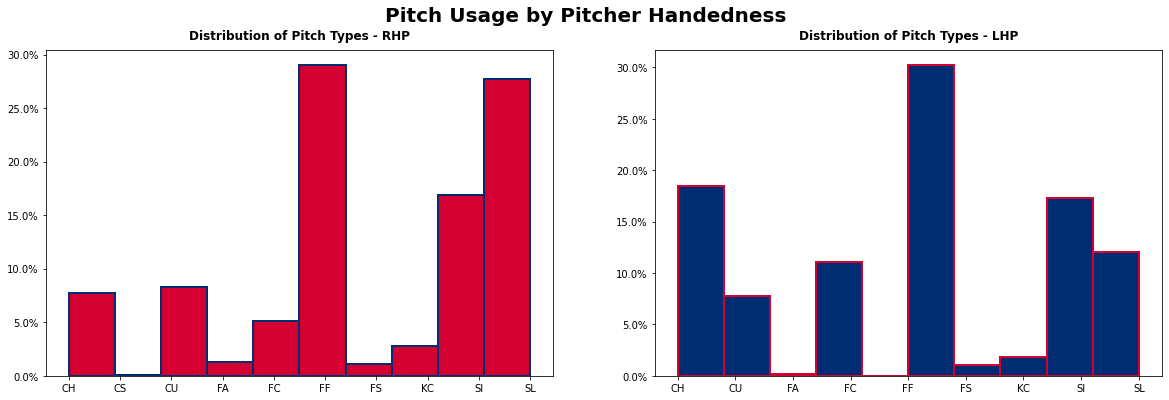

In [19]:
r_swanson.dropna(subset=['pitch_type'], inplace = True)
l_swanson.dropna(subset=['pitch_type'], inplace = True)
blue = '#002D72'
red = '#D50032'
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Pitch Usage by Pitcher Handedness', fontsize = 20, fontweight = 'bold')
dist_r = r_swanson.pitch_type.sort_values()
axs[0].hist(dist_r, weights = np.ones(len(dist_r)) / len(dist_r), color = red, edgecolor = blue, linewidth = 2)
axs[0].yaxis.set_major_formatter(PercentFormatter(1))
axs[0].set_title('Distribution of Pitch Types - RHP', fontdict = font_title, pad = 15)
dist_l = l_swanson.pitch_type.sort_values()
axs[1].hist(dist_l, weights = np.ones(len(dist_l)) / len(dist_l), color = blue, edgecolor = red, linewidth = 2)
axs[1].yaxis.set_major_formatter(PercentFormatter(1))
axs[1].set_title('Distribution of Pitch Types - LHP', fontdict = font_title, pad = 15);

### Pitch Type by Count

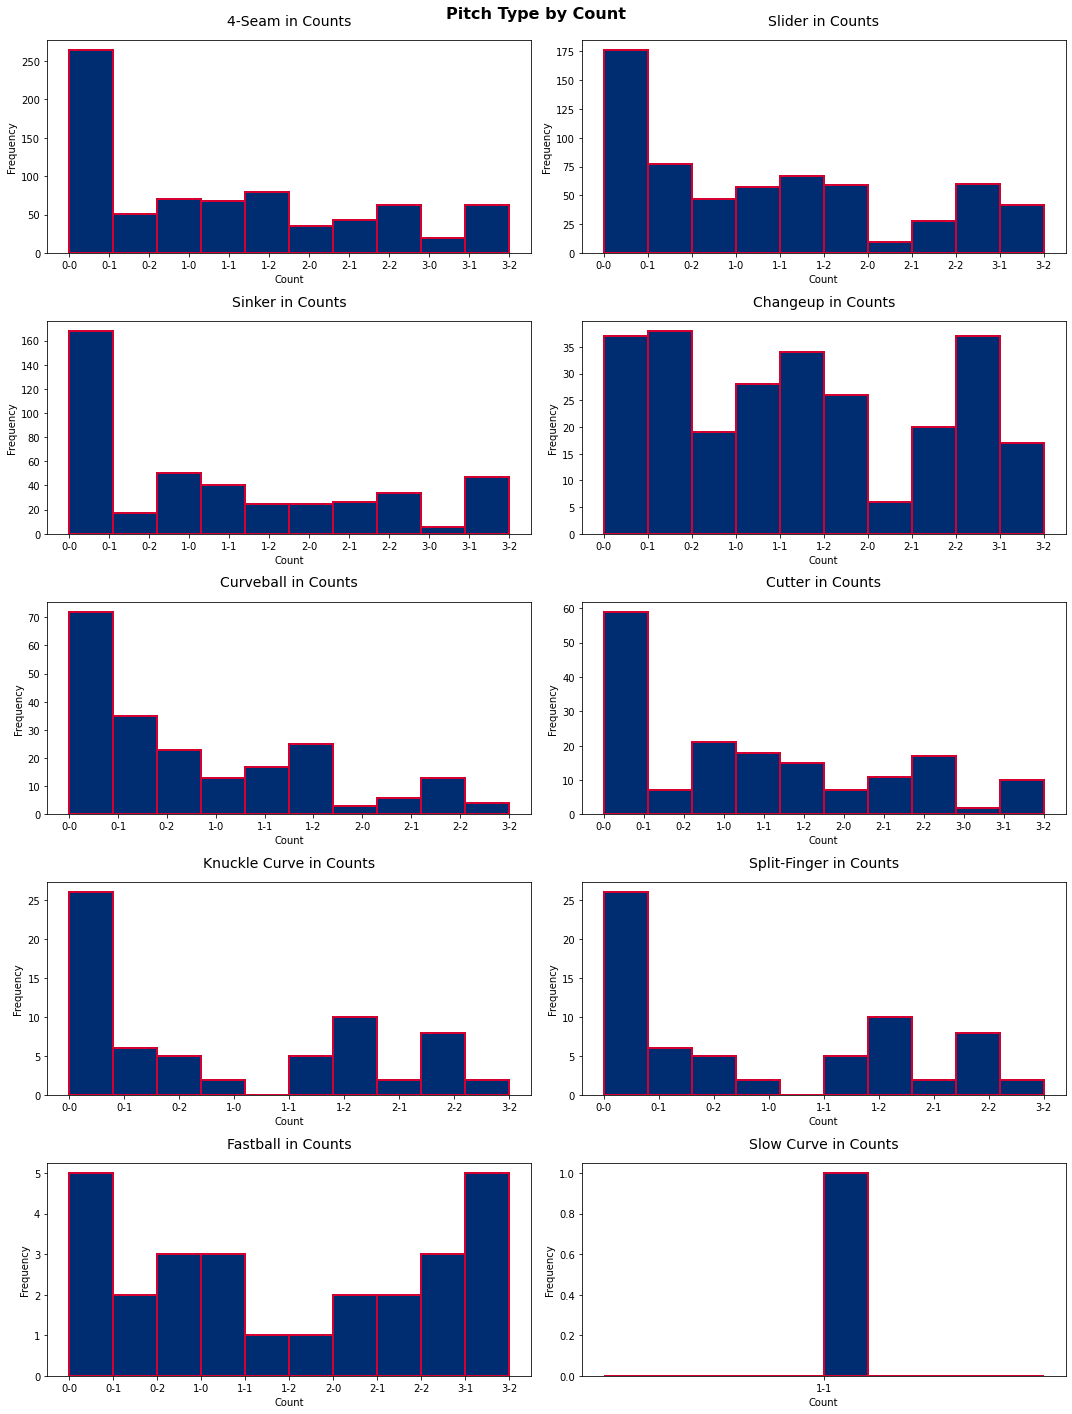

In [20]:
fig, axs = plt.subplots(5, 2, figsize = (15, 20))
fig.suptitle('Pitch Type by Count', fontsize = 16, fontweight = 'bold')
plt.setp(axs[0:, :], xlabel = 'Count'), plt.setp(axs[:, 0:], ylabel = 'Frequency')
axs[0][0].hist(ff['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][0].set_title('4-Seam in Counts', fontsize = 14, pad = 15)
axs[0][1].hist(sl['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][1].set_title('Slider in Counts', fontsize = 14, pad = 15)
axs[1][0].hist(si['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][0].set_title('Sinker in Counts', fontsize = 14, pad = 15)
axs[1][1].hist(ch['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][1].set_title('Changeup in Counts', fontsize = 14, pad = 15)
axs[2][0].hist(cu['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[2][0].set_title('Curveball in Counts', fontsize = 14, pad = 15)
axs[2][1].hist(fc['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[2][1].set_title('Cutter in Counts', fontsize = 14, pad = 15)
axs[3][0].hist(kc['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[3][0].set_title('Knuckle Curve in Counts', fontsize = 14, pad = 15)
axs[3][1].hist(kc['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[3][1].set_title('Split-Finger in Counts', fontsize = 14, pad = 15)
axs[4][0].hist(fa['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[4][0].set_title('Fastball in Counts', fontsize = 14, pad = 15)
axs[4][1].hist(cs['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[4][1].set_title('Slow Curve in Counts', fontsize = 14, pad = 15)
plt.tight_layout();

# Heatmaps

### In-Zone Take Heatmaps - by Pitch Type vs. RHP

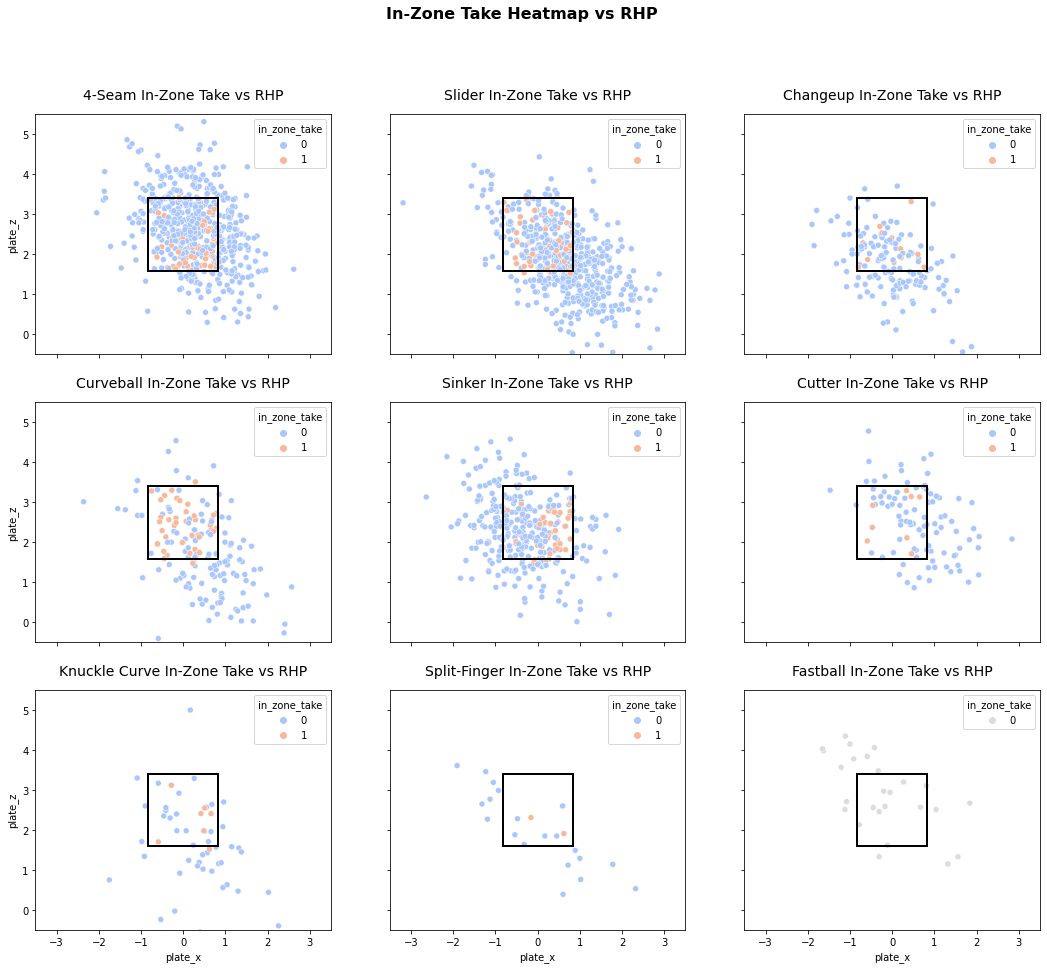

In [21]:
fig, axs = plt.subplots(3, 3, figsize = (18, 15), sharex = True, sharey = True)
fig.suptitle('In-Zone Take Heatmap vs RHP', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data=r_ff,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('4-Seam In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data=r_sl,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Slider In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data=r_ch,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('Changeup In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data=r_cu,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Curveball In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data=r_si,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Sinker In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data=r_fc,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('Cutter In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][0],data=r_kc,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[2][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][0].set_title('Knuckle Curve In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][1],data=r_fs,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[2][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][1].set_title('Split-Finger In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][2],data=r_fa,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[2][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][2].set_title('Fastball In-Zone Take vs RHP', fontsize = 14, pad = 15);

### In-Zone Take Heatmaps - by Pitch Type vs. LHP

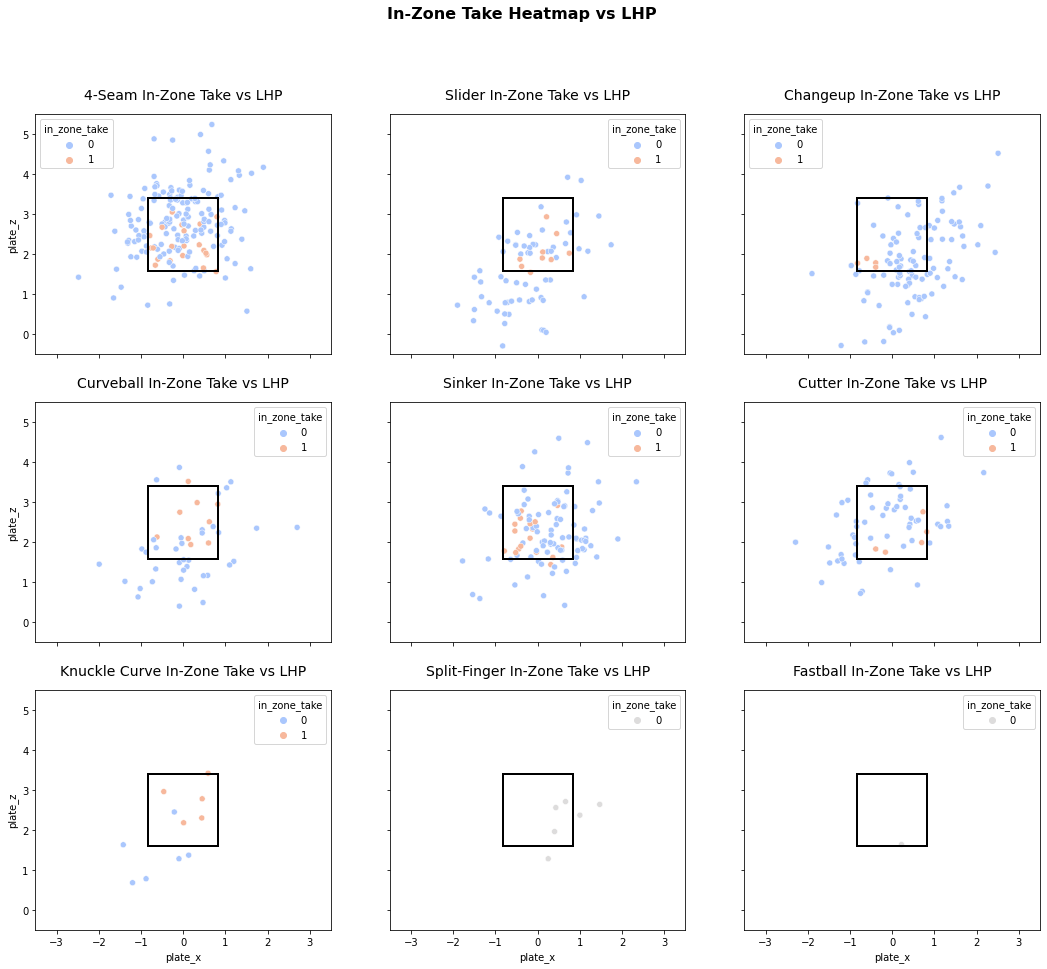

In [22]:
fig, axs = plt.subplots(3, 3, figsize = (18, 15), sharex = True, sharey = True)
fig.suptitle('In-Zone Take Heatmap vs LHP', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data=l_ff,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('4-Seam In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data=l_sl,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Slider In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data=l_ch,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('Changeup In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data=l_cu,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Curveball In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data=l_si,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Sinker In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data=l_fc,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('Cutter In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][0],data=l_kc,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[2][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][0].set_title('Knuckle Curve In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][1],data=l_fs,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[2][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][1].set_title('Split-Finger In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][2],data=l_fa,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[2][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][2].set_title('Fastball In-Zone Take vs LHP', fontsize = 14, pad = 15);

### Out-of-Zone Chase Heatmaps - by Pitch Type vs. RHP

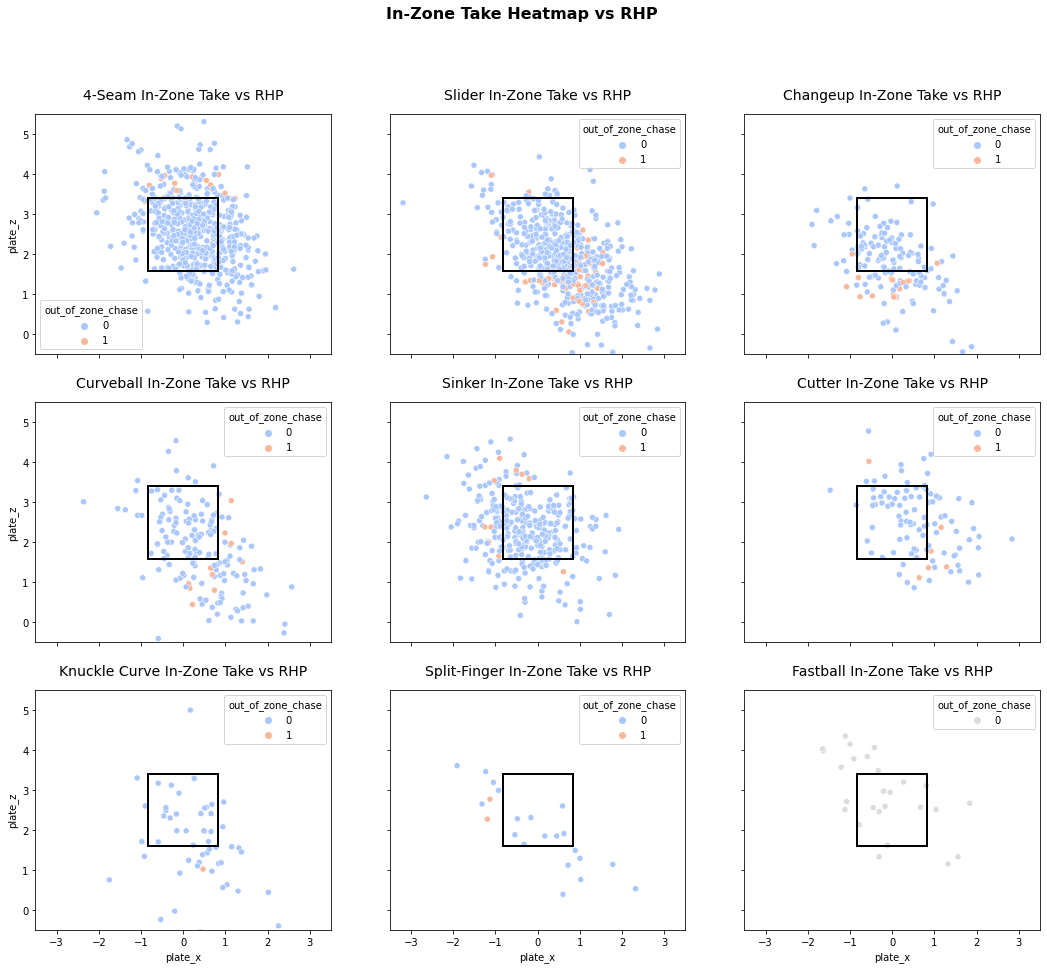

In [23]:
fig, axs = plt.subplots(3, 3, figsize = (18, 15), sharex = True, sharey = True)
fig.suptitle('In-Zone Take Heatmap vs RHP', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data=r_ff,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('4-Seam In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data=r_sl,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Slider In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data=r_ch,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('Changeup In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data=r_cu,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Curveball In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data=r_si,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Sinker In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data=r_fc,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('Cutter In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][0],data=r_kc,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[2][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][0].set_title('Knuckle Curve In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][1],data=r_fs,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[2][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][1].set_title('Split-Finger In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][2],data=r_fa,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[2][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][2].set_title('Fastball In-Zone Take vs RHP', fontsize = 14, pad = 15);

### Out-of-Zone Chase Heatmaps - by Pitch Type vs. LHP

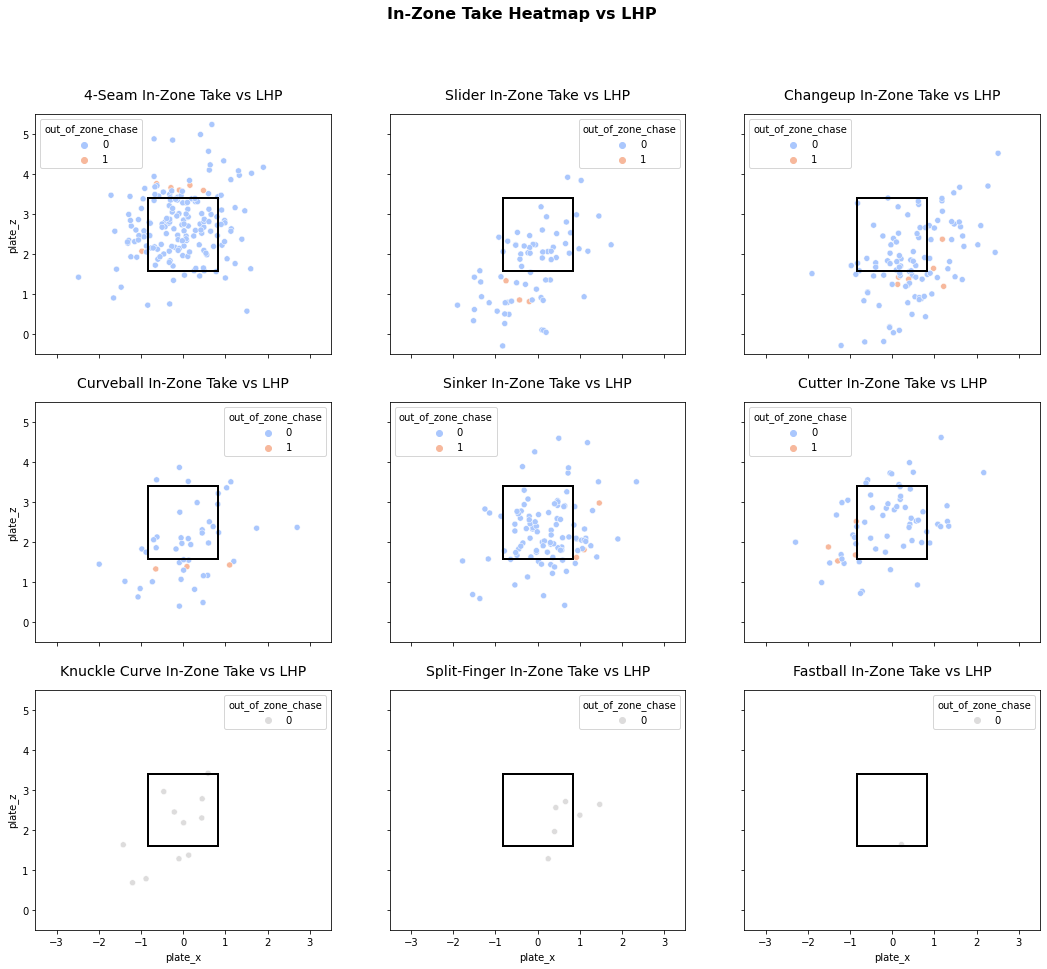

In [24]:
fig, axs = plt.subplots(3, 3, figsize = (18, 15), sharex = True, sharey = True)
fig.suptitle('In-Zone Take Heatmap vs LHP', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data=l_ff,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('4-Seam In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data=l_sl,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Slider In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data=l_ch,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('Changeup In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data=l_cu,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Curveball In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data=l_si,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Sinker In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data=l_fc,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('Cutter In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][0],data=l_kc,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[2][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][0].set_title('Knuckle Curve In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][1],data=l_fs,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[2][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][1].set_title('Split-Finger In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][2],data=l_fa,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[2][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][2].set_title('Fastball In-Zone Take vs LHP', fontsize = 14, pad = 15);

### 4-Seam Heatmaps

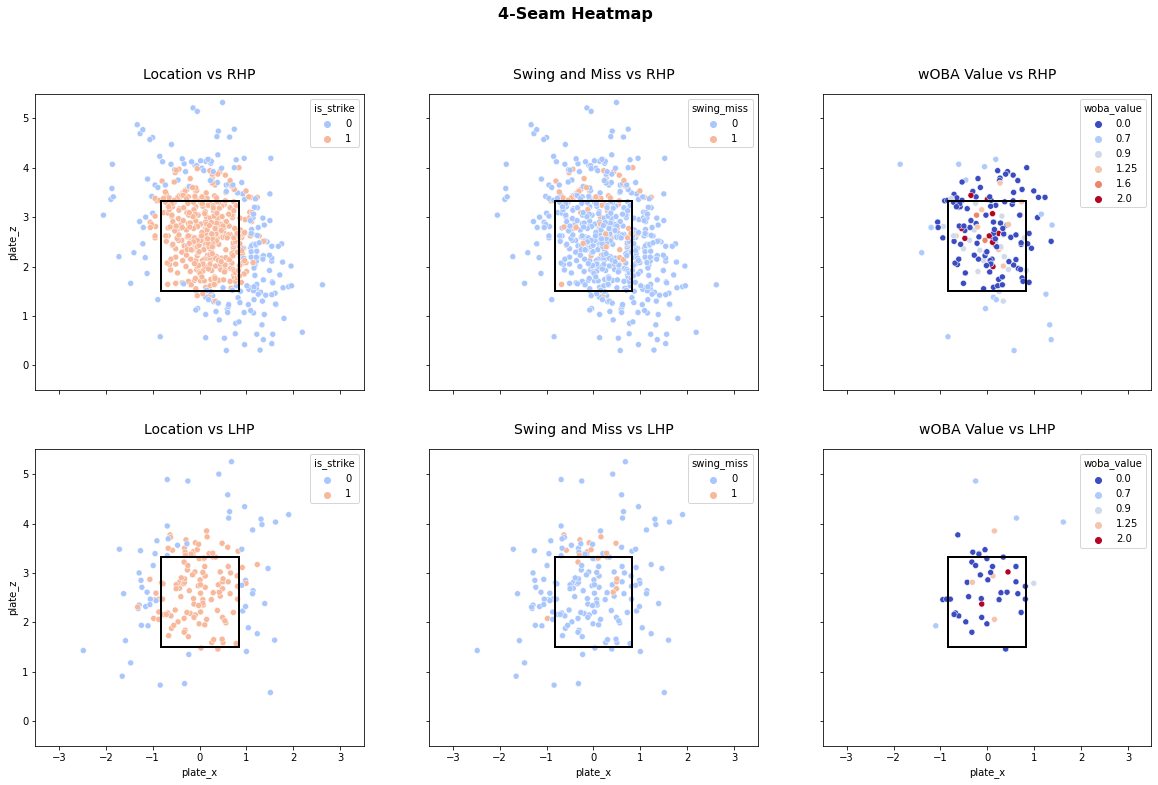

In [25]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('4-Seam Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Slider Heatmaps

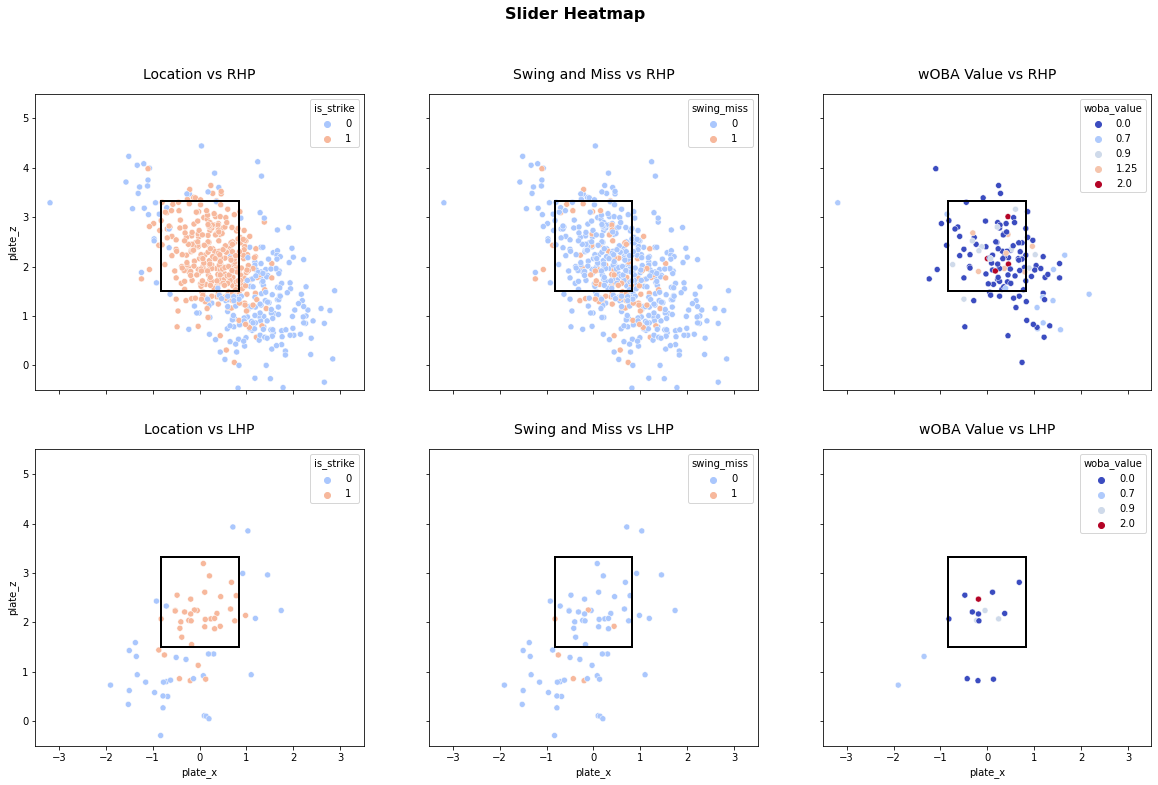

In [26]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Slider Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Sinker Heatmaps

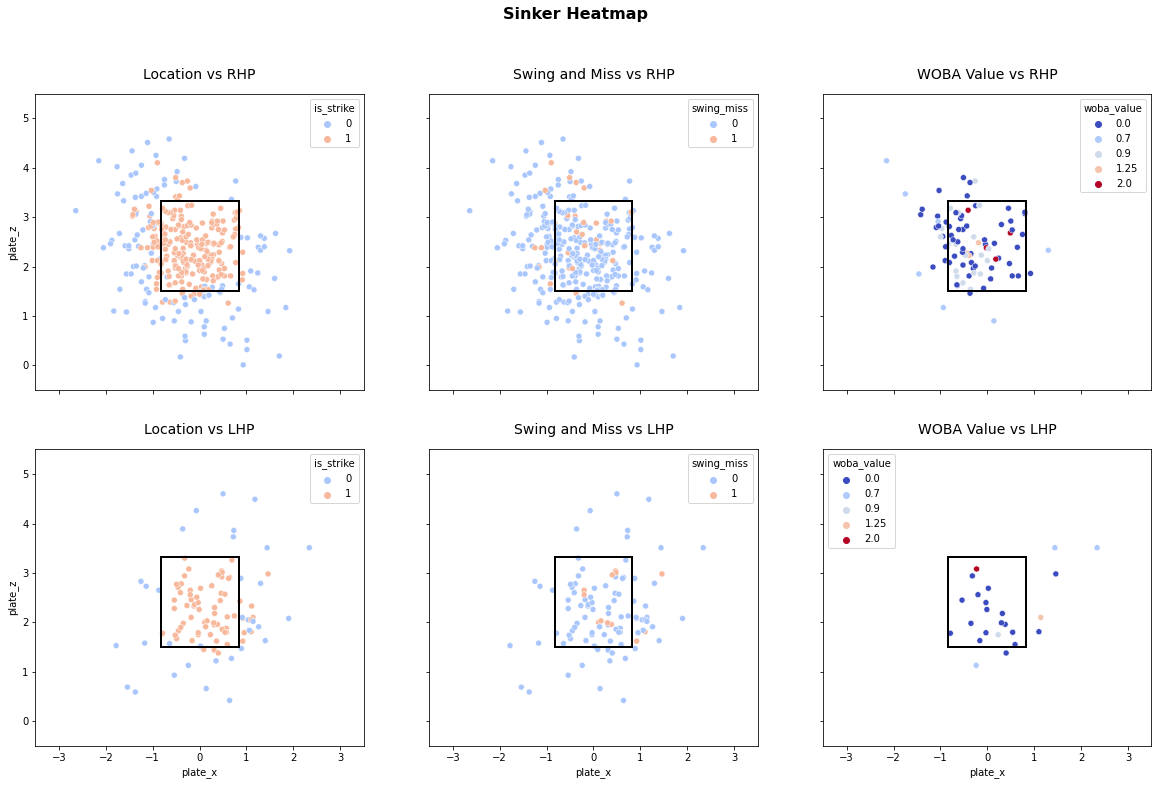

In [27]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Sinker Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 14, pad = 15);

### Changeup Heatmaps

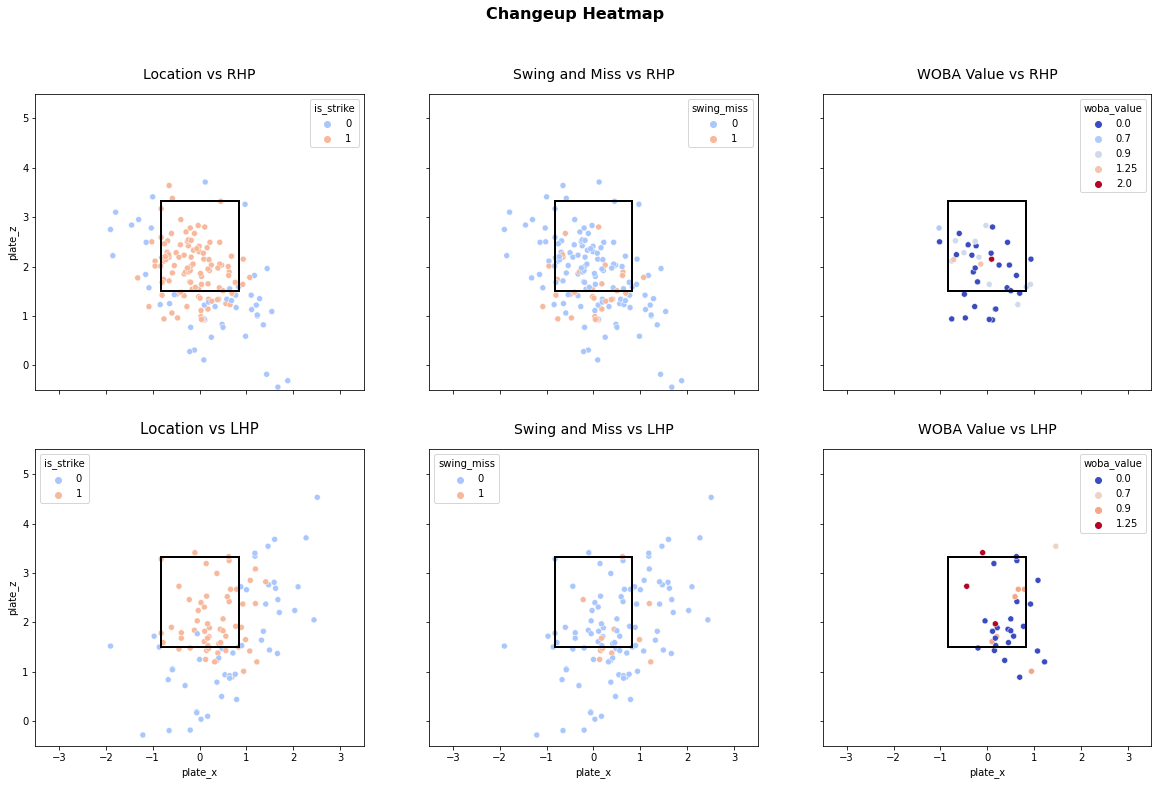

In [28]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Changeup Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 15, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 14, pad = 15);

### Curveball Heatmaps

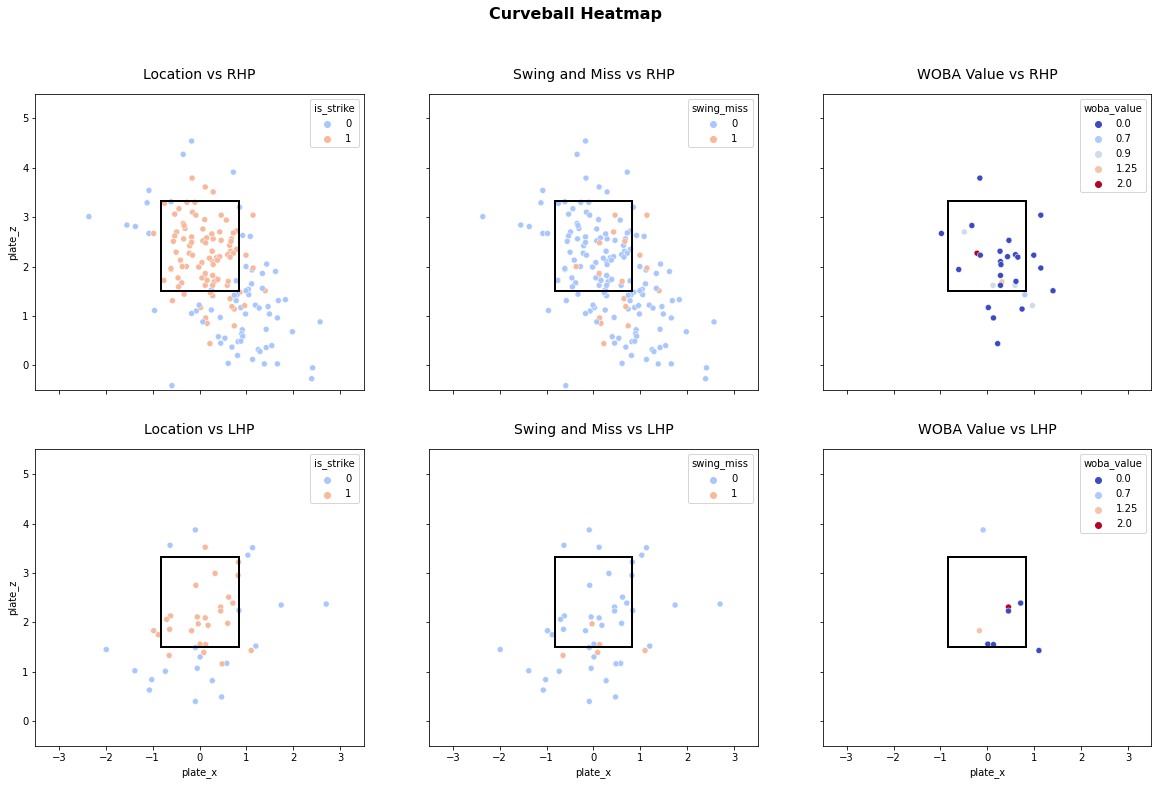

In [29]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Curveball Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 14, pad = 15);

### Cutter Heatmaps

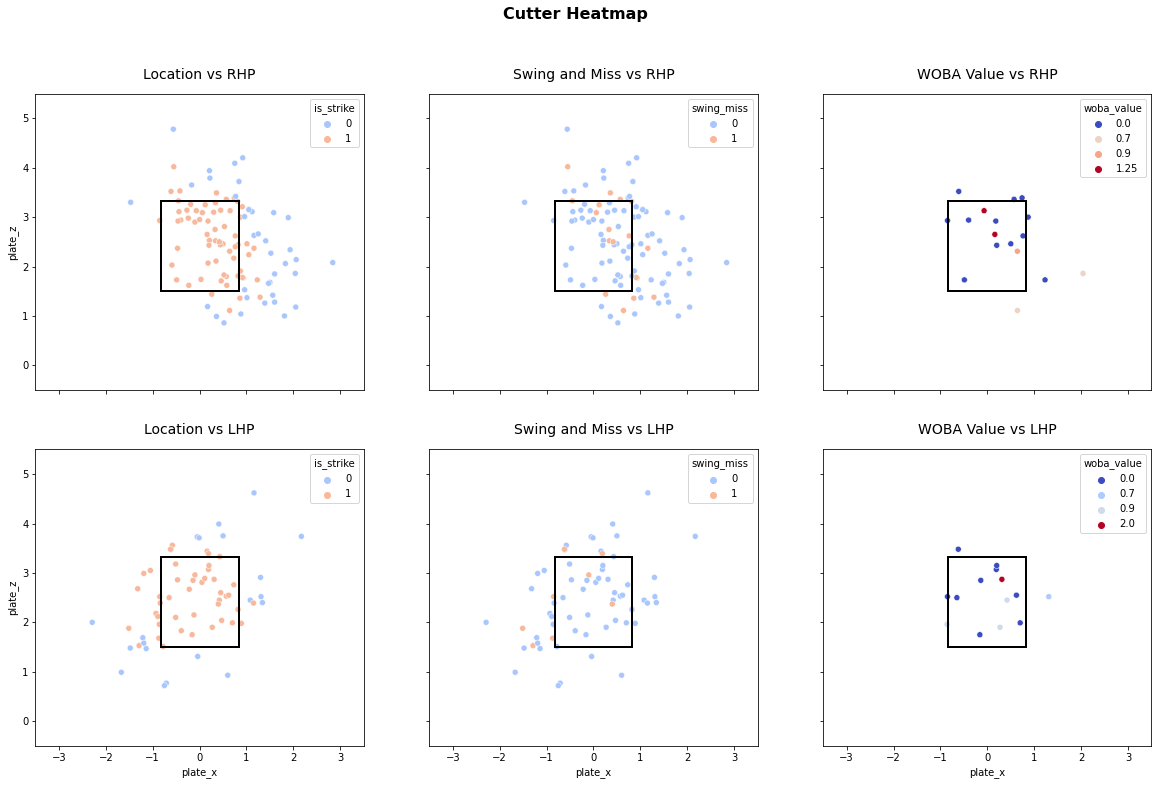

In [30]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Cutter Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 14, pad = 15);

### Knuckle Curve Heatmaps

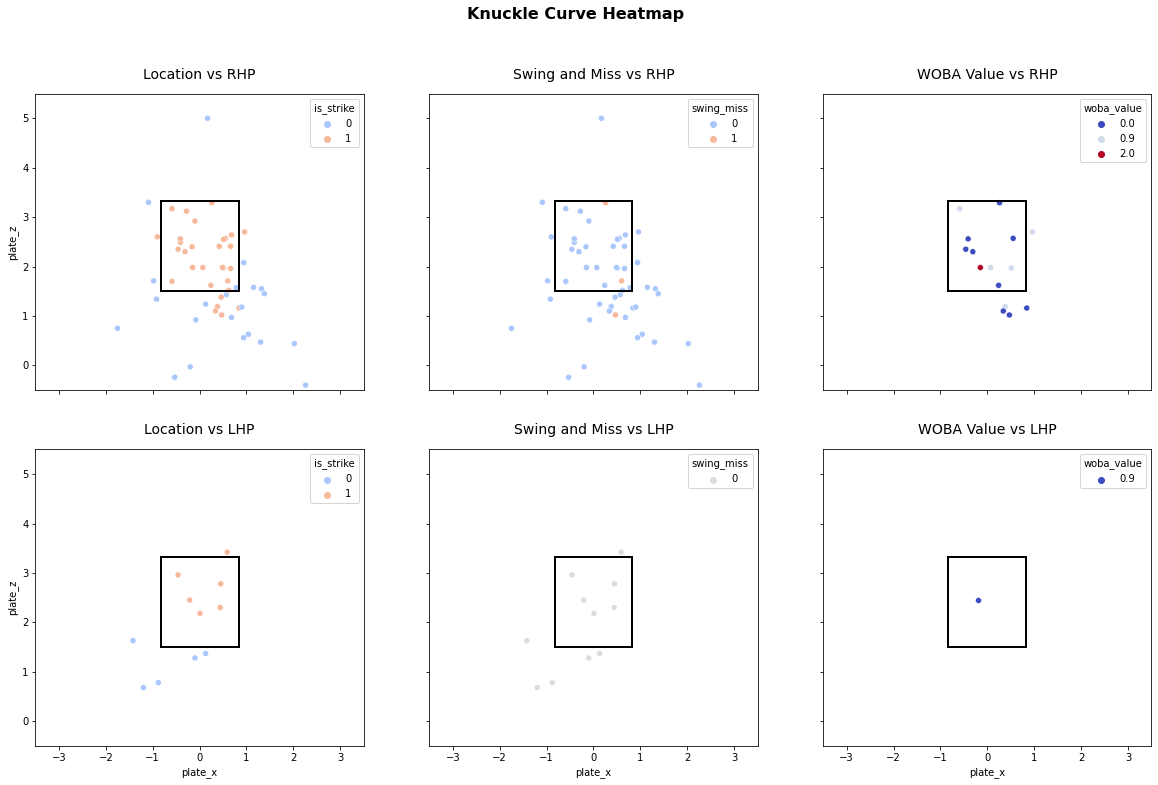

In [31]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Knuckle Curve Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 14, pad = 15);

### Split-Finger Heatmaps

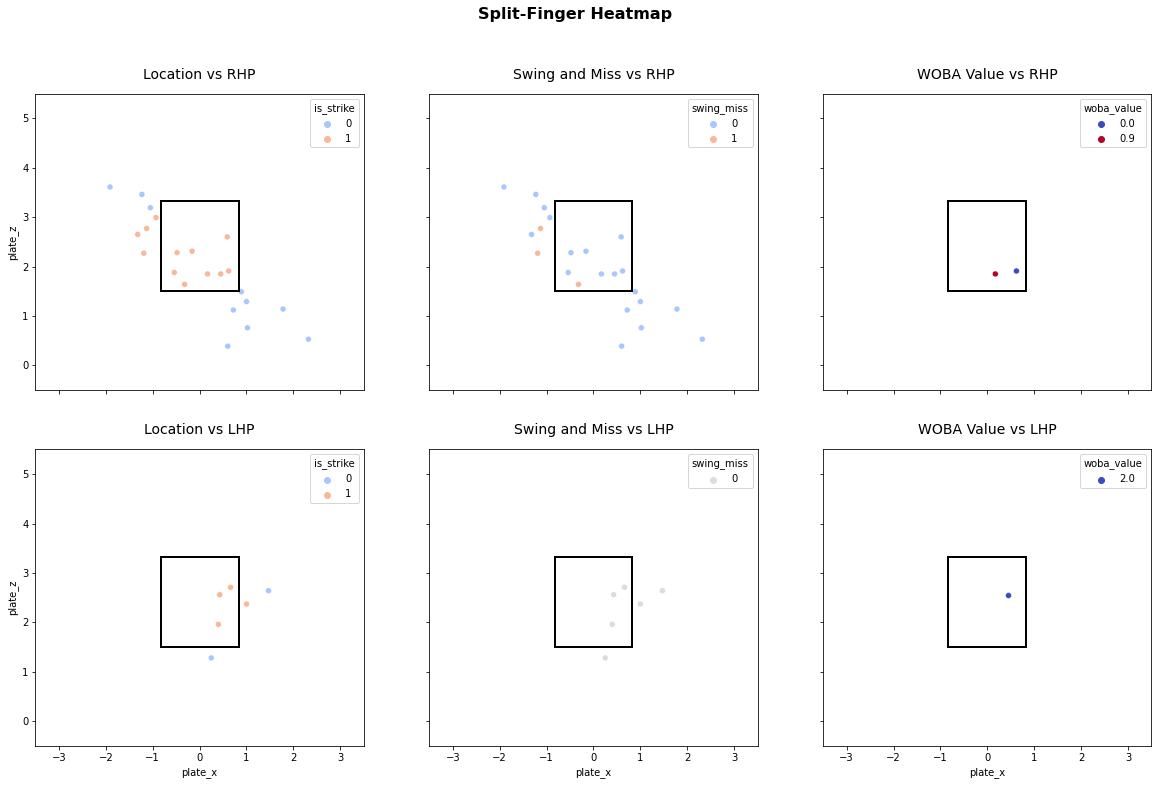

In [32]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Split-Finger Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 14, pad = 15);

### Fastball Heatmaps

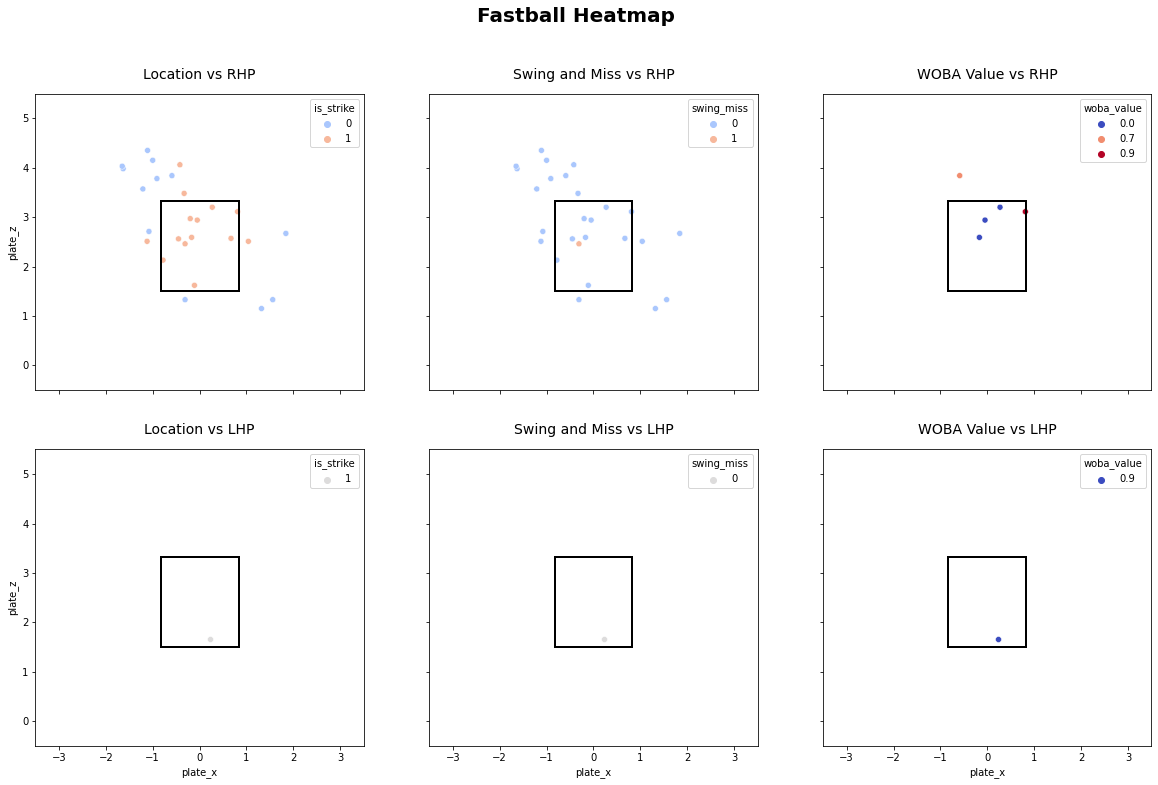

In [33]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Fastball Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_fa,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_fa,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_fa,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_fa,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_fa,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_fa,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 14, pad = 15);

### Slow Curve Heatmaps

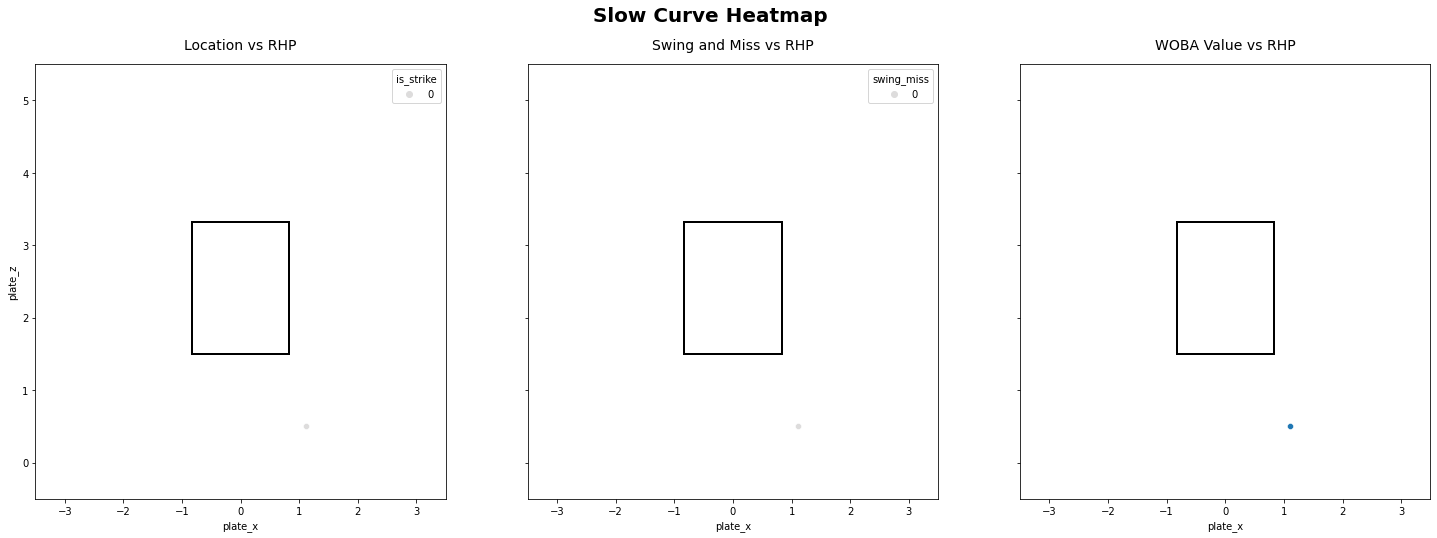

In [34]:
fig, axs = plt.subplots(1, 3, figsize = (25, 8), sharex = True, sharey = True)
fig.suptitle('Slow Curve Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0],data = r_cs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1],data = r_cs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2],data = r_cs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2].set_title('WOBA Value vs RHP', fontsize = 14, pad = 15);